# 第6课：Optimization

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Finding the root of a mathematical function

In [2]:
# 构造函数

f = lambda x: np.cos(x) - x

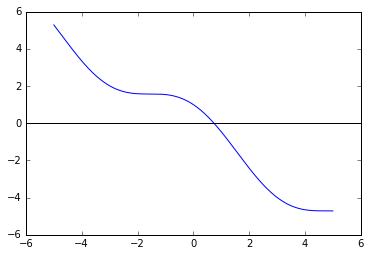

In [3]:
x = np.linspace(-5,5,1000)
y = f(x)
plt.plot(x,y)
plt.axhline(0, color='k');

In [11]:
opt.bisect?

In [13]:
plt.axhline?

In [22]:
opt.bisect(f,-5,5)

0.7390851332155535

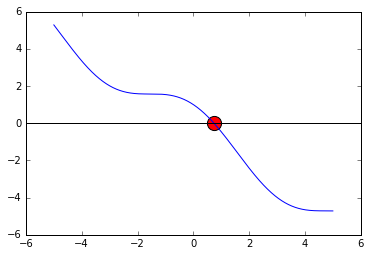

In [25]:
plt.plot(x,y)
plt.axhline(0, color='k')
#plt.scatter([_], [0], c='r', s=100);
plt.scatter([opt.bisect(f,-5,5)],[0], c='r', s=200);

In [26]:
opt.brentq(f,-5,5)

0.7390851332151607

In [27]:
%timeit opt.bisect(f,-5,5)
%timeit opt.brentq(f,-5,5)

10000 loops, best of 3: 43 µs per loop
100000 loops, best of 3: 9.57 µs per loop


## 2. Minimizing a mathematical function

In [28]:
f = lambda x: 1-np.sin(x)/x

In [29]:
x = np.linspace(-20.,20.,1000)
y = f(x)

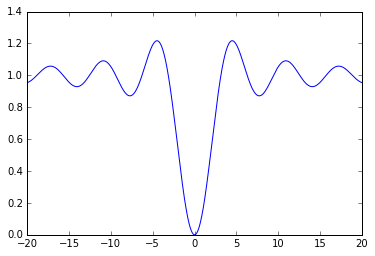

In [31]:
plt.plot(x,y);

In [34]:
opt.minimize?

In [33]:
x0 = 3
opt.minimize(f, x0)

      fun: 0.0
 hess_inv: array([[ 3.00002214]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([ -1.55387330e-08])

In [36]:
xmin = opt.minimize(f,x0).x

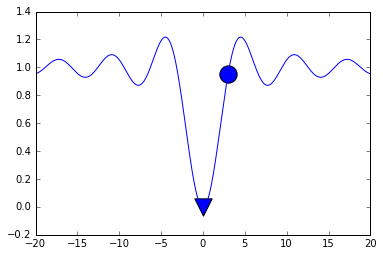

In [40]:
plt.plot(x,y)
plt.scatter(x0, f(x0), marker='o', s=300)
plt.scatter(xmin, f(xmin), marker='v', s=300);
plt.xlim(-20,20);

In [41]:
x0 = 5
xmin = opt.minimize(f,x0).x

In [42]:
xmin

array([ 7.72525073])

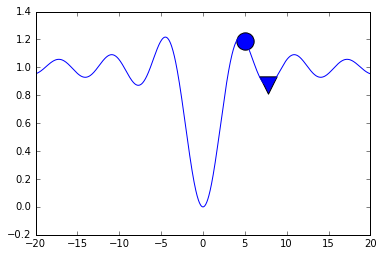

In [44]:
plt.plot(x,y)
plt.scatter(x0,f(x0),marker='o',s=300)
plt.scatter(xmin,f(xmin),marker='v',s=300)
plt.xlim(-20,20);

In [45]:
from scipy.optimize import basinhopping

In [47]:
xmin = basinhopping(f,x0,stepsize=5).x
xmin

array([  1.32970502e-08])

In [51]:
xmin = basinhopping(f,x0,stepsize=1).x
xmin

array([ 7.72525185])

In [53]:
xmin = basinhopping(f,x0,stepsize=3).x
xmin

array([ -8.78138909e-09])

In [54]:
xmin = basinhopping(f,x0,stepsize=300).x
xmin

array([ 7.72525073])

In [56]:
basinhopping?

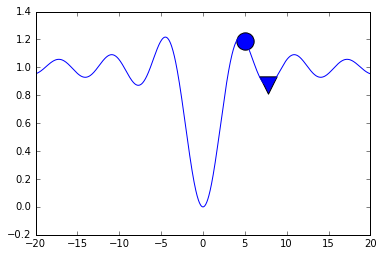

In [57]:
plt.plot(x,y)
plt.scatter(x0,f(x0),marker='o',s=300)
plt.scatter(xmin,f(xmin),marker='v',s=300)
plt.xlim(-20,20);

In [4]:
def g(X):
    x,y = X
    return (x-1)**4 + 5*(y-1)**2 -2*x*y

In [5]:
X_opt = opt.minimize(g,(8,3)).x

In [247]:
X_opt

array([ 1.88292611,  1.37658521])

In [248]:
ax.contour?

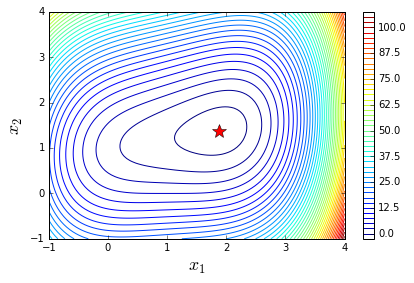

In [6]:
fig, ax = plt.subplots(figsize=(6,4))

# 绘制等高线
x_ = y_ = np.linspace(-1,4,100)
X, Y = np.meshgrid(x_,y_) # 构建平面坐标
c = ax.contour(X, Y, g((X, Y)),50) # 画图（轮廓）

# 画出最低点  
ax.plot(X_opt[0],X_opt[1], 'r*', markersize=15)

# 设置轴名
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

# 设置色彩条  
plt.colorbar(c, ax=ax)

fig.tight_layout()

In [84]:
X.size

10000

In [85]:
x_.size

100

In [87]:
X==Y

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

## 3. Straight-line Fit

<Container object of 3 artists>

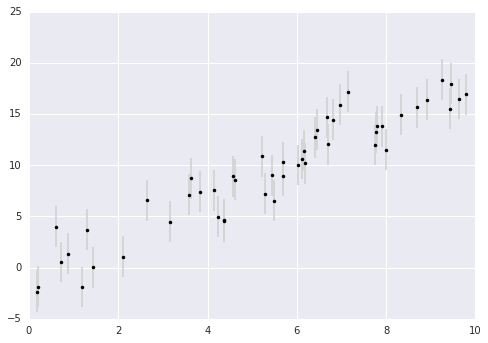

In [176]:
N = 50
m_true = 2
b_true = -1
dy = 2.0

np.random.seed(0)
xdata = 10*np.random.random(N)
ydata = np.random.normal(b_true + m_true *xdata, dy)

plt.errorbar(xdata, ydata, xerr=None, yerr=dy, fmt='.k', ecolor='lightgray');
# xdata为横坐标数据，ydata为纵坐标数据（蓝色的点），dy为误差项（标准差）

In [103]:
import seaborn as sns

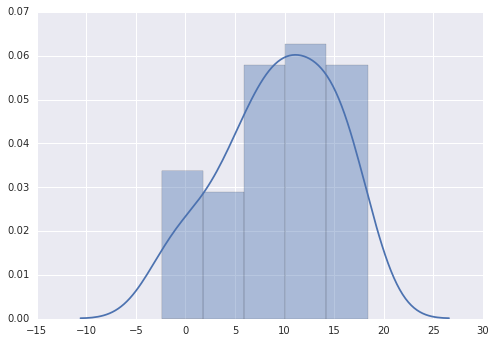

In [177]:
sns.distplot(ydata);

In [113]:
ydata.size

50

In [114]:
xdata.size

50

In [119]:
type(xdata)

numpy.ndarray

In [118]:
type(dy)

float

In [120]:
dy

2.0

In [123]:
plt.errorbar?

### Method 1: using scipy.optimize.minimize

In [178]:
# 残差平方和，使用minimize和fmin，需要构造平方和的函数，leastsq不需要
def chi2(theta, x, y):
    return np.sum((y-theta[0]-theta[1]*x)**2)

In [179]:
theta_guess = [0,1]
theta_best = opt.fmin(chi2, theta_guess, args=(xdata,ydata))
print(theta_best)

Optimization terminated successfully.
         Current function value: 171.105514
         Iterations: 70
         Function evaluations: 129
[-1.01441373  1.93854462]


In [180]:
opt.fmin?

In [181]:
# minimize()后面没有.x
theta_guess = [0,1]
theta_best = opt.minimize(chi2, theta_guess, args=(xdata,ydata))
print(theta_best)

      fun: 171.10551373611762
 hess_inv: array([[ 0.0490411 , -0.00725718],
       [-0.00725718,  0.00134901]])
      jac: array([ -3.81469727e-06,  -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-1.01442005,  1.93854656])


In [182]:
theta_guess = [0,1]
theta_best = opt.minimize(chi2, theta_guess, args=(xdata,ydata)).x
print(theta_best)

[-1.01442005  1.93854656]


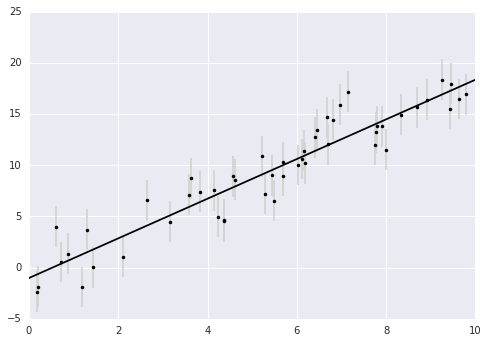

In [183]:
xfit = np.linspace(0,10)
yfit = theta_best[0] + theta_best[1]* xfit

plt.errorbar(xdata,ydata,yerr=dy,fmt='.k',ecolor='lightgray');
plt.plot(xfit,yfit,'-k');

### Method 2: Least Squares Fitting

In [184]:
# 使用leastsq函数不需要构造平方和函数，残差表达式即可
def deviations(theta, x, y):
    return (y- theta[0] - theta[1]*x)

In [185]:
theta_best, ier = opt.leastsq(deviations, theta_guess, args=(xdata,ydata))
print(theta_best)

[-1.01442016  1.93854659]


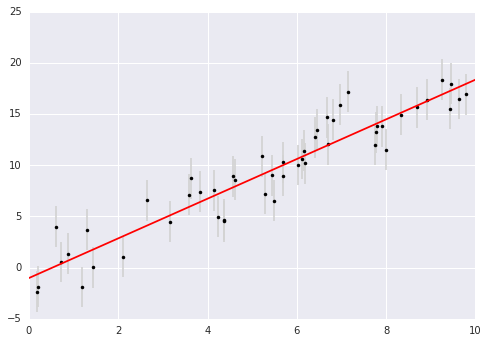

In [186]:
yfit = theta_best[0] + theta_best[1]*xfit

plt.errorbar(xdata,ydata,yerr=dy, fmt='.k', ecolor='lightgray');

plt.plot(xfit,yfit,'-r');

### Nonlinear least square

In [187]:
# step 1: 定义函数
def f(x,beta0, beta1, beta2):
    return beta0 + beta1 * np.exp(-beta2 * x **2)

In [188]:
# step 2: 确定beta，xdata，以此计算真实的y
beta = (0.25, 0.75, 0.5)

In [189]:
xdata = np.linspace(0, 5, 50)

In [190]:
y = f(xdata, *beta)

In [191]:
# Step 3：拟合
ydata = y + 0.05 * np.random.randn(len(xdata)) # 给y值赋一个扰动项

In [192]:
# 构造函数，注意是“构造”，构造使用最小二乘法的函数
def g(beta):
    return ydata - f(xdata,*beta)
# 此处beta并不一定等于真值（step2确定的值），f函数是用预测的beta计算y值
# 这里需要注意的是，我们只是不知道beta值，整个f函数的样子还是知道，
# 就好像线性回归一样，我们只是不知道斜率和截距。

In [193]:
beta_start = (1,1,1)

In [194]:
# 最小二乘法拟合，比线性（线性是已知xdata，ydata求对应的直线）还简单，不需要args
beta_opt,beta_cov = opt.leastsq(g,beta_start)
beta_opt

array([ 0.25493905,  0.76190464,  0.46526094])

In [195]:
beta_cov

1

In [199]:
# 另一种方法
beta_opt2, beta_cov2 = opt.curve_fit(f,xdata,ydata)
beta_opt2

array([ 0.25493905,  0.76190464,  0.46526094])

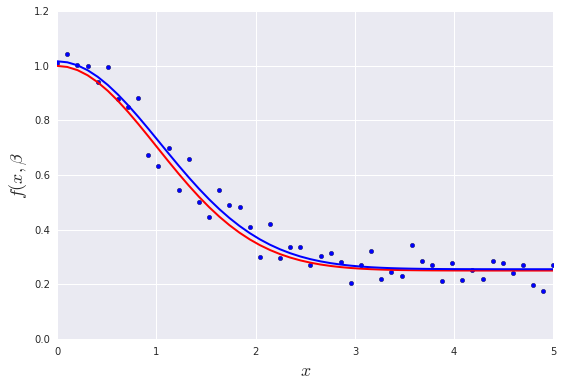

In [204]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata) # 观测值
ax.plot(xdata, y, 'r', lw=2) # 实际曲线
ax.plot(xdata, f(xdata,*beta_opt),'b',lw=2) # 拟合曲线
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta$", fontsize=18)
fig.tight_layout()

## 4.Constrained optimization

### Bounds

In [7]:
def f(X):
    x,y=X
    return (x-1)**2 + (y-1)**2

In [8]:
# 找出最低点
# 求解无约束非线性优化问题最常用的方法之一
x_opt = opt.minimize(f,(0,0),method='BFGS').x
x_opt

array([ 0.99999999,  0.99999999])

In [9]:
# 设置初始值
bnd_x1, bnd_x2=(2,3),(0,2)

In [10]:
# 有约束的最低点位置
x_cons_opt = opt.minimize(f,np.array([0,0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
x_cons_opt

array([ 2.,  1.])

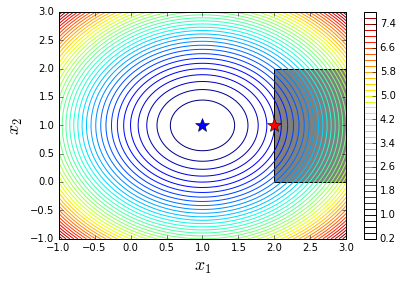

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

x_ = y_ = np.linspace(-1,3,100)
X, Y = np.meshgrid(x_,y_)
c = ax.contour(X, Y, f((X,Y)), 50)

# 画出最低点
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

# 画出约束区域边界
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                          facecolor='gray')
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c,ax=ax)
fig.tight_layout()

### Inequality constraints

In [12]:
def f(X):
    return (X[0] -1)**2 + (X[1] -1)**2

# 约束函数
def g(X):
    return X[1] -1.75 - (X[0] - 0.75)**4

In [13]:
x_opt = opt.minimize(f,(0,0),method='BFGS').x
x_opt

array([ 0.99999999,  0.99999999])

In [14]:
constraints = [dict(type='ineq',fun=g)]
constraints

[{'fun': <function __main__.g>, 'type': 'ineq'}]

In [15]:
x_cons_opt = opt.minimize(f,(0,0), method='SLSQP',constraints=constraints).x
x_cons_opt

array([ 0.96857656,  1.75228252])

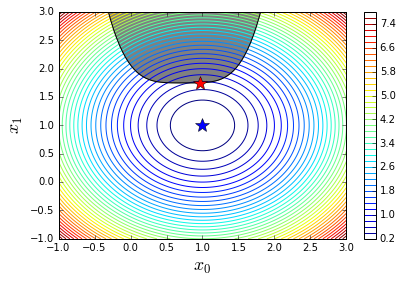

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f((X, Y)), 50)

ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

# 画出约束曲线和区间
ax.plot(x_,1.75+(x_-0.75)**4,'k-',markersize=15)
ax.fill_between(x_,1.75+(x_-0.75)**4, 3, color="gray")

ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()

## 补充

### mplot3d

In [18]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

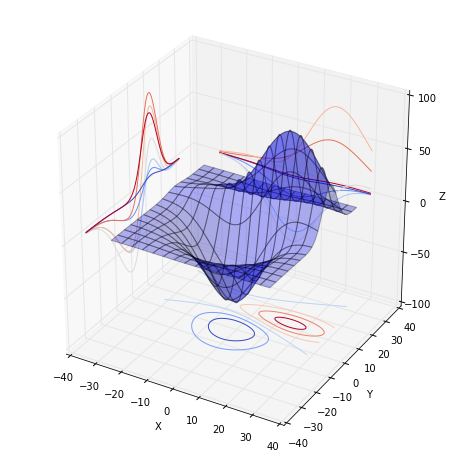

In [45]:
fig = plt.figure(figsize=(8,8))
ax = fig .gca(projection='3d')

X,Y,Z=axes3d.get_test_data(0.05)

ax.plot_surface(X,Y,Z, rstride=8, cstride=8, alpha=0.3)

cset = ax.contour(X,Y,Z,zdir='z',offset=-100,cmap=cm.coolwarm)
cset = ax.contour(X,Y,Z,zdir='x',offset=-40,cmap=cm.coolwarm)
cset = ax.contour(X,Y,Z,zdir='y',offset=40,cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-100,100)

plt.show()

In [39]:
ax.plot_surface?